In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
raw = pd.ExcelFile('Crime.xls')

In [3]:
df = raw.parse('13tbl8ny')

In [4]:
df = df.drop(df.index[[0,1,2,3]])

In [5]:
df.drop('Unnamed: 4', axis=1, inplace=True)

In [6]:
df.rename(columns={'Table 8': 'City', 'Unnamed: 1': 'Population', 'Unnamed: 2': 'Violent Crime', 'Unnamed: 5': 'Murder/Manslaughter'}, inplace=True)

In [7]:
df.rename(columns={'Unnamed: 3': 'Murder', 'Murder/Manslaughter': 'Rape', 'Unnamed: 6': 'Robbery', 
                'Unnamed: 7': 'Aggravated Assault', 'Unnamed: 8': 'Property Crime', 'Unnamed: 9': 'Burglary',
                'Unnamed: 10': 'Larceny-Theft', 'Unnamed: 11': 'Motor Vehicle Theft', 'Unnamed: 12': 'Arson'  }, inplace=True)

In [15]:
df['Population']

4        1861
5        2577
6        2846
7       97956
8        6388
9        4089
10       1781
11     118296
12       9519
13      18182
14       2053
15       4523
16        658
17       2522
18      27270
19       3333
20       7473
21       5418
22      15374
23       5733
24      17627
25      34243
26      46304
27       1410
28      12001
29       1022
30       2325
31       2054
32       2065
33       2358
        ...  
322      3642
323       615
324     12195
325     61686
326     27980
327      6887
328     27940
329      3012
330      3453
331      5828
332      8392
333      5175
334     28179
335     10245
336      1862
337      4337
338     43777
339      1797
340      4574
341      1732
342     44821
343      2604
344     57559
345      3733
346      9141
347     10685
348       829
349      5931
350    199134
351     36643
Name: Population, Length: 348, dtype: object

In [8]:
df = df.drop(df.index[[349,350,348]])

In [9]:
df['Robbery'] = df.Robbery.apply(lambda x: 0 if x== 0 else 1)

In [10]:
df['Murder'] = df.Murder.apply(lambda x: 0 if x== 0 else 1)

In [25]:
df['Population_2'] = df['Population']**2

In [12]:
regr = linear_model.LinearRegression()
Y = df['Property Crime']
X = df[['Murder', 'Robbery', 'Population', 'Population_2' ]]
regr.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print('\nCoefficients: \n', np.round(regr.coef_,decimals=2))
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
pd.set_option('display.precision', 2)
#Our first attempt at a model had a very high r squared number but also had a negative correlation for Robbery which did not
#Seem to make sense. We decide to investigate further.


Coefficients: 
 [  1.51400000e+01  -9.62800000e+01   3.00000000e-02  -0.00000000e+00]

Intercept: 
 -109.572518554

R-squared:
0.99612471045


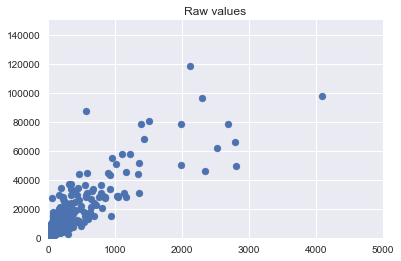

In [18]:
plt.scatter(df['Property Crime'], df['Population'])
plt.title('Raw values')
plt.xlim(0,5000)
plt.ylim(0,150000)
plt.show()
#The majority of our data is clustered and seems relative linear. We will remove outliers to improve accuracy and maintain linear form.

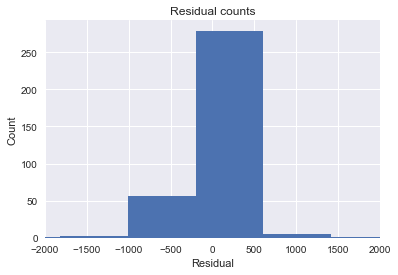

In [19]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property Crime']
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlim(-2000,2000)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
#We saw a very common error of -500. Again we will remove outliers in subsequent runs to improve multivariate normality.

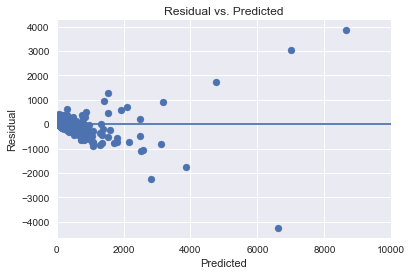

In [20]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.xlim(0,10000)
plt.title('Residual vs. Predicted')
plt.show()
#Again as this graph shows it will help our data to remove outliers. Some of our data is in object form rather than integer form.
#We will try and correct these errors with our second run through.

In [21]:
df['Population']= df['Population'].astype(int)

In [22]:
df = df[df['Population'] < 100000]

In [23]:
df['Property Crime']= df['Property Crime'].astype(int)

In [26]:
df['Population_2'] = df['Population_2'].astype(int)

In [27]:
#We run Regression again with all data as integers and outliers removed.
regr = linear_model.LinearRegression()
Y = df['Property Crime']
X = df[['Murder', 'Robbery', 'Population', 'Population_2' ]]
regr.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print('\nCoefficients: \n', np.round(regr.coef_,decimals=2))
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
pd.set_option('display.precision', 2)
#Our R squared is significantly lower but our correlations seem to make much more sense than previous. Time to test our other
#assumptions.


Coefficients: 
 [  1.57350000e+02   3.76500000e+01   2.00000000e-02  -0.00000000e+00]

Intercept: 
 -58.923204464

R-squared:
0.734711719065


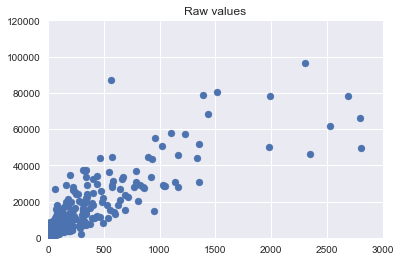

In [30]:
plt.scatter(df['Property Crime'], df['Population'])
plt.title('Raw values')
plt.xlim(0,3000)
plt.ylim(0,120000)
plt.show()
#Still a few outliers but much fewer. Our residuals will see if we have improved our error.

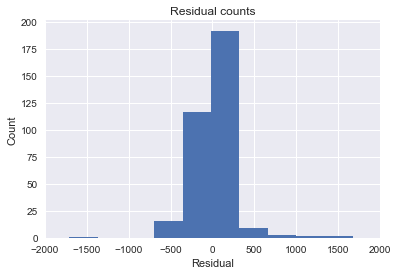

In [31]:
predicted = regr.predict(X).ravel()
actual = df['Property Crime']
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlim(-2000,2000)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
#Our residual error is much more clustered around 0 and spreads less far out. This works well for our model.

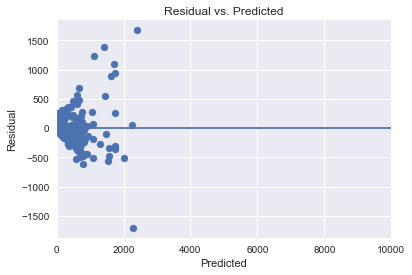

In [35]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.xlim(0,10000)
plt.title('Residual vs. Predicted')
plt.show()
#Using the same scale as previous we can see our data is more clustered around the 0 axis.
#Finally we will run a correlation matrix to test our last assumption.

In [36]:
df[['Population','Population_2', 'Property Crime', 'Murder', 'Robbery']].corr()

,Population,Population_2,Property Crime,Murder,Robbery
Population,1.000,0.343,0.849,0.470,0.443
Population_2,0.343,1.000,0.237,0.114,0.244
Property Crime,0.849,0.237,1.000,0.487,0.410
Murder,0.470,0.114,0.487,1.000,0.296
Robbery,0.443,0.244,0.410,0.296,1.000


Population predicitably has the highest correlation with property crime, but none of the features are overly correlated with each other. By eliminating the outliers and converting all our data to integer form we have improved on our assumptions that are needed for linear regression. In the next project we will look to improve our model as a whole to improve predictive power.